# Лабораторная работа №3

## DecisionTreeClassifier / Бейзлайн 

### Импорт

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Загрузка датасета

In [2]:
df_class = pd.read_csv('alzheimers.csv')
print("Alzheimer's Dataset shape:", df_class.shape)
df_class.head()

Alzheimer's Dataset shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### Предобработка данных

In [3]:
columns_to_drop = ['PatientID', 'DoctorInCharge'] if 'PatientID' in df_class.columns else []
if columns_to_drop:
    df_class = df_class.drop(columns=columns_to_drop)
    print(f"\nУдалены колонки: {columns_to_drop}")


print("\nРаспределение целевой переменной (Diagnosis):")
print(df_class['Diagnosis'].value_counts())
print(f"Баланс классов: {df_class['Diagnosis'].value_counts(normalize=True)}")

X = df_class.drop('Diagnosis', axis=1)
y = df_class['Diagnosis']


Удалены колонки: ['PatientID', 'DoctorInCharge']

Распределение целевой переменной (Diagnosis):
Diagnosis
0    1389
1     760
Name: count, dtype: int64
Баланс классов: Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


### Разделение на обучающую и тестовую выборки

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nРазмеры выборок:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Размеры выборок:
X_train: (1719, 32), X_test: (430, 32)
y_train: (1719,), y_test: (430,)


### Создание и обучение базовой модели DecisionTreeClassifier

In [5]:
clf_tree_baseline = DecisionTreeClassifier(random_state=42)
clf_tree_baseline.fit(X_train, y_train)

y_pred = clf_tree_baseline.predict(X_test)
y_pred_proba = clf_tree_baseline.predict_proba(X_test)[:, 1]

### Оценка модели по метрикам

Accuracy: 0.9000
Precision: 0.8471
Recall: 0.8750
F1-Score: 0.8608
ROC-AUC: 0.8943

Матрица ошибок:
[[254  24]
 [ 19 133]]


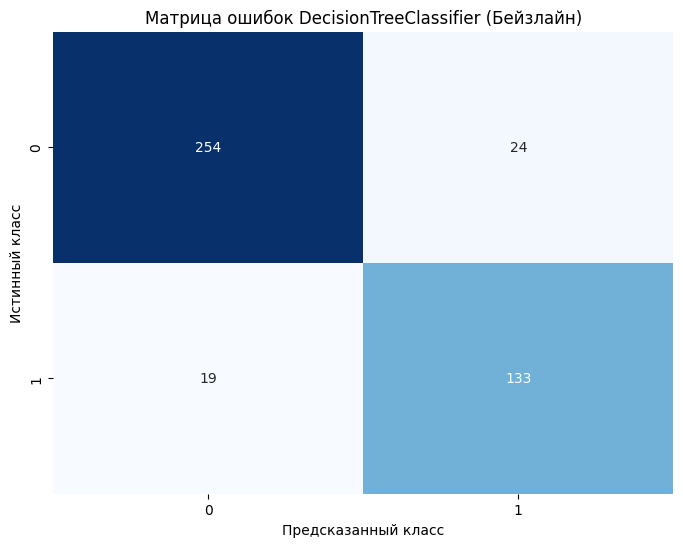

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок DecisionTreeClassifier (Бейзлайн)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()



##  DecisionTreeRegressor / Бейзлайн 

### Импорт

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Загрузка датасета

In [8]:
df_reg = pd.read_csv('student_performance.csv')
print("Student Dataset shape:", df_reg.shape)
df_reg.head()

Student Dataset shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Предобработка данных для регрессии

In [9]:
df_students_prepared = df_reg.copy()
missing_df = df_reg.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()

print("Колонки с пропусками:", columns_with_missing)
for column in columns_with_missing:
    mode_value = df_students_prepared[column].mode()[0] 
    df_students_prepared[column].fillna(mode_value, inplace=True)
missing_after = df_students_prepared.isnull().sum().sum()
print(f"\nПропусков после заполнения: {missing_after}")
categorical_cols = df_students_prepared.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols:
    categorical_cols.remove('Exam_Score')

print(f"\nКатегориальные колонки для кодирования: {categorical_cols}")
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

X_reg = df_students_prepared.drop('Exam_Score', axis=1)
y_reg = df_students_prepared['Exam_Score']

X_reg_encoded = preprocessor.fit_transform(X_reg)
encoder = preprocessor.named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_cols)
numeric_features = [col for col in X_reg.columns if col not in categorical_cols]
all_features = list(encoded_cat_features) + numeric_features
print(f"\nРазмерность признаков после кодирования: {X_reg_encoded.shape}")
print(f"Количество признаков: {len(all_features)}")

Колонки с пропусками: ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

Пропусков после заполнения: 0

Категориальные колонки для кодирования: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Размерность признаков после кодирования: (6607, 27)
Количество признаков: 27


### Разделение на обучающую и тестовую выборки

In [10]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42
)
print(f"Размеры выборок для регрессии:")
print(f"X_train: {X_train_reg.shape}, X_test: {X_test_reg.shape}")
print(f"y_train: {y_train_reg.shape}, y_test: {y_test_reg.shape}")

Размеры выборок для регрессии:
X_train: (5285, 27), X_test: (1322, 27)
y_train: (5285,), y_test: (1322,)


### Создание и обучение базовой модели DecisionTreeRegressor

In [11]:
reg_tree_baseline = DecisionTreeRegressor(random_state=42)
reg_tree_baseline.fit(X_train_reg, y_train_reg)

y_pred_reg = reg_tree_baseline.predict(X_test_reg)

### Оценка модели по метрикам

MAE: 1.9145
MSE: 15.0159
RMSE: 3.8750
R²: -0.0623


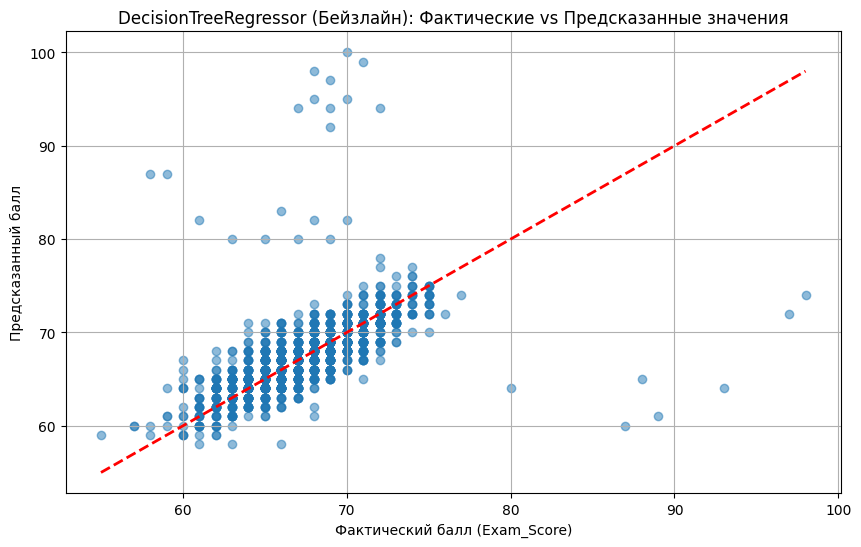

In [12]:
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)


print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Фактический балл (Exam_Score)')
plt.ylabel('Предсказанный балл')
plt.title('DecisionTreeRegressor (Бейзлайн): Фактические vs Предсказанные значения')
plt.grid(True)
plt.show()


##	Улучшение бейзлайна

## DecisionTreeClassifier

### Формулировка гипотез для улучшения модели классификации

**Гипотеза 1:  Балансировка классов через class_weight**
- **Что сделаем:** Используем параметр class_weight='balanced' в DecisionTreeClassifier для автоматической балансировки весов классов.
- **Обоснование:** В исходных данных наблюдается дисбаланс. Модель с параметрами по умолчанию оптимизирует общую точность, что может привести к плохому предсказанию миноритарного класса. Балансировка весов заставит модель обращать больше внимания на миноритарный класс.

**Гипотеза 2: Ограничение сложности дерева для борьбы с переобучением**
- **Что сделаем:**  Установим ограничения на глубину дерева и минимальное количество образцов в листе.
- **Обоснование:** Деревья решений склонны к переобучению, особенно с параметрами по умолчанию. Ограничение глубины и минимального размера листьев упростит модель, улучшит её обобщающую способность и снизит дисперсию.

**Гипотеза 3: Создание новых медицински значимых признаков**
- **Что сделаем:**  Создать 3 новых признака:Cardiovascular_Risk - бинарный признак наличия хотя бы одного из: CardiovascularDisease, Diabetes, Hypertension, Cholesterol_Ratio - соотношение LDL/HDL (фактор риска атеросклероза), Age_Group - категоризация возраста на группы (60-70, 71-80, 81-90)
- **Обоснование:** Алгоритмы машинного обучения часто лучше работают с признаками, которые отражают медицинские закономерности. Эти признаки могут помочь дереву находить более осмысленные разделения.

**Гипотеза 4: Отбор наиболее важных признаков**
- **Что сделаем:**  Проанализировать важность признаков в baseline-модели и оставить только топ-15 наиболее важных.
- **Обоснование:** Деревья решений могут страдать от шумных или нерелевантных признаков. Отбор наиболее важных признаков может уменьшить переобучение и ускорить обучение.

**Гипотеза 5: Подбор гиперпараметров через GridSearchCV**
- **Что сделаем:** Использовать кросс-валидацию для поиска оптимальных гиперпараметров
- **Обоснование:** Параметры по умолчанию редко являются оптимальными. Систематический поиск по сетке параметров с кросс-валидацией позволяет найти наилучшую комбинацию для конкретной задачи.

### Проверка гипотез

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

baseline_metrics = {
    'Accuracy': 0.9000,
    'Precision': 0.8471,
    'Recall': 0.8750,
    'F1-Score': 0.8608,
    'ROC-AUC': 0.8943
}
experiment_results = {
    'baseline': baseline_metrics
}

### Гипотеза 1: Балансировка классов

Сравнение (class_weight='balanced') с Baseline
Accuracy: Baseline=0.9000, Balanced=0.8953, Изменение=-0.0047
Precision: Baseline=0.8471, Balanced=0.8323, Изменение=-0.0148
Recall: Baseline=0.8750, Balanced=0.8816, Изменение=+0.0066
F1-Score: Baseline=0.8608, Balanced=0.8562, Изменение=-0.0046
ROC-AUC: Baseline=0.8943, Balanced=0.8922, Изменение=-0.0021


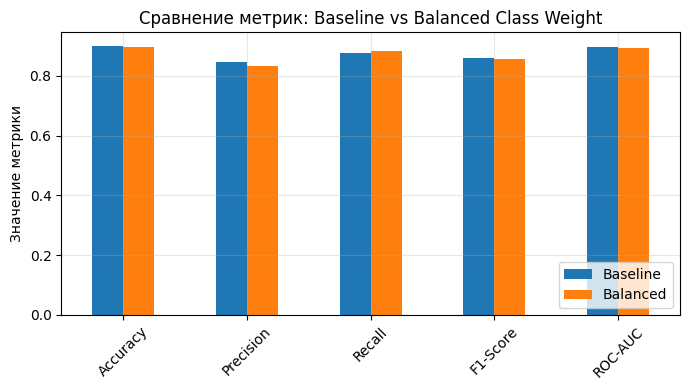

Вывод по Гипотезе 1:
Балансировака классов не улучшила модель


In [14]:
clf_balanced = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf_balanced.fit(X_train, y_train)

y_pred_balanced = clf_balanced.predict(X_test)
y_pred_proba_balanced = clf_balanced.predict_proba(X_test)[:, 1]

metrics_balanced = {
    'Accuracy': accuracy_score(y_test, y_pred_balanced),
    'Precision': precision_score(y_test, y_pred_balanced),
    'Recall': recall_score(y_test, y_pred_balanced),
    'F1-Score': f1_score(y_test, y_pred_balanced),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_balanced)
}

print("Сравнение (class_weight='balanced') с Baseline")
for metric in baseline_metrics:
    improvement = metrics_balanced[metric] - baseline_metrics[metric]
    print(f"{metric}: Baseline={baseline_metrics[metric]:.4f}, Balanced={metrics_balanced[metric]:.4f}, Изменение={improvement:+.4f}")

metrics_df = pd.DataFrame({
    'Baseline': list(baseline_metrics.values()),
    'Balanced': list(metrics_balanced.values())
}, index=list(baseline_metrics.keys()))

metrics_df.plot(kind='bar', figsize=(7, 4))
plt.title('Сравнение метрик: Baseline vs Balanced Class Weight')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print("Вывод по Гипотезе 1:")
print("Балансировака классов не улучшила модель")

### Гипотеза 2: Ограничение сложности дерева

Metric	Baseline	Balanced	Pruned

Accurac	0.9000		0.8953		0.9488
Precisi	0.8471		0.8323		0.9333
Recall	0.8750		0.8816		0.9211
F1-Scor	0.8608		0.8562		0.9272
ROC-AUC	0.8943		0.8922		0.9456


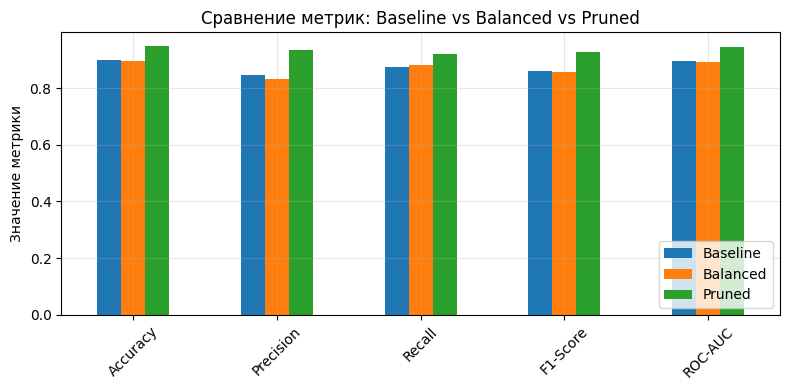

Вывод по Гипотезе 2:
  Гипотеза подтверждена: Балансировка классов улучшила модель.
  Все метрики улучшились.


In [15]:
clf_pruned = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_leaf=10
)
clf_pruned.fit(X_train, y_train)

y_pred_pruned = clf_pruned.predict(X_test)
y_pred_proba_pruned = clf_pruned.predict_proba(X_test)[:, 1]

metrics_pruned = {
    'Accuracy': accuracy_score(y_test, y_pred_pruned),
    'Precision': precision_score(y_test, y_pred_pruned),
    'Recall': recall_score(y_test, y_pred_pruned),
    'F1-Score': f1_score(y_test, y_pred_pruned),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_pruned)
}

print("Metric\tBaseline\tBalanced\tPruned\n")
for metric in baseline_metrics:
    print(f"{metric[:7]}\t{baseline_metrics[metric]:.4f}\t\t{metrics_balanced[metric]:.4f}\t\t{metrics_pruned[metric]:.4f}")

metrics_comparison = pd.DataFrame({
    'Baseline': list(baseline_metrics.values()),
    'Balanced': list(metrics_balanced.values()),
    'Pruned': list(metrics_pruned.values())
}, index=list(baseline_metrics.keys()))

metrics_comparison.plot(kind='bar', figsize=(8, 4))
plt.title('Сравнение метрик: Baseline vs Balanced vs Pruned')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


print("Вывод по Гипотезе 2:")
print("  Гипотеза подтверждена: Балансировка классов улучшила модель.")
print("  Все метрики улучшились.")



### Гипотеза 3: Создание новых признаков


Сравнение метрик:
Метрика		baseline	Enhanced	Изменение
Accurac		0.9000		0.9093		+0.0093
Precisi		0.8471		0.8693		+0.0222
Recall		0.8750		0.8750		+0.0000
F1-Scor		0.8608		0.8721		+0.0113
ROC-AUC		0.8943		0.9015		+0.0072

Количество улучшенных метрик: 4/5
 Гипотеза подтвердилась: Создание новых признаков улучшило модель

Новые признаки в топ-15 важных: 1 из 4


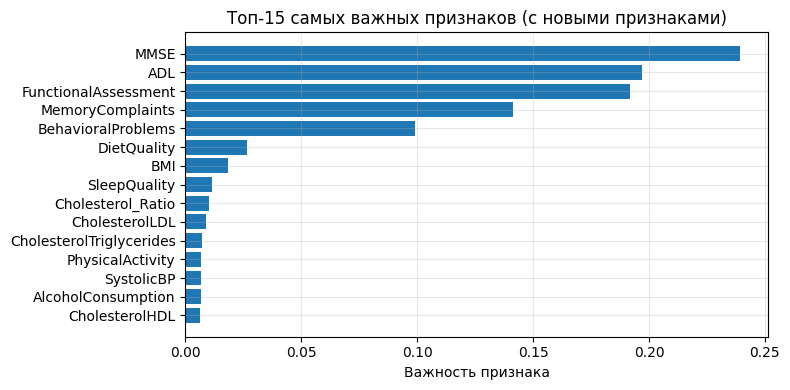

In [16]:
df_class_enhanced = df_class.copy()

df_class_enhanced['Cardiovascular_Risk'] = (
    df_class_enhanced['CardiovascularDisease'] | 
    df_class_enhanced['Diabetes'] | 
    df_class_enhanced['Hypertension']
).astype(int)

df_class_enhanced['Cholesterol_Ratio'] = (
    df_class_enhanced['CholesterolLDL'] / 
    (df_class_enhanced['CholesterolHDL'] + 0.01)
)

bins = [60, 70, 80, 90]
labels = ['60-70', '71-80', '81-90']
df_class_enhanced['Age_Group'] = pd.cut(df_class_enhanced['Age'], bins=bins, labels=labels, right=False)

df_class_enhanced = pd.get_dummies(df_class_enhanced, columns=['Age_Group'], drop_first=True)

X_enhanced = df_class_enhanced.drop('Diagnosis', axis=1)
y_enhanced = df_class_enhanced['Diagnosis']

X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42, stratify=y_enhanced
)

clf_enhanced = DecisionTreeClassifier(
    random_state=42,
)
clf_enhanced.fit(X_train_enh, y_train_enh)

y_pred_enhanced = clf_enhanced.predict(X_test_enh)
y_pred_proba_enhanced = clf_enhanced.predict_proba(X_test_enh)[:, 1]

metrics_enhanced = {
    'Accuracy': accuracy_score(y_test_enh, y_pred_enhanced),
    'Precision': precision_score(y_test_enh, y_pred_enhanced),
    'Recall': recall_score(y_test_enh, y_pred_enhanced),
    'F1-Score': f1_score(y_test_enh, y_pred_enhanced),
    'ROC-AUC': roc_auc_score(y_test_enh, y_pred_proba_enhanced)
}

print("\nСравнение метрик:")
print("Метрика\t\tbaseline\tEnhanced\tИзменение")
for metric in baseline_metrics:
    change = metrics_enhanced[metric] - baseline_metrics[metric]
    print(f"{metric[:7]}\t\t{baseline_metrics[metric]:.4f}\t\t{metrics_enhanced[metric]:.4f}\t\t{change:+.4f}")

improved_metrics = 0
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    if metrics_enhanced[metric] > baseline_metrics[metric]:
        improved_metrics += 1

print(f"\nКоличество улучшенных метрик: {improved_metrics}/5")

if improved_metrics >= 3:
    print(" Гипотеза подтвердилась: Создание новых признаков улучшило модель")
    if metrics_enhanced['Recall'] > baseline_metrics['Recall']:
        print(f"  - Особенно улучшился Recall (+{metrics_enhanced['Recall'] - baseline_metrics['Recall']:.4f}), что важно для медицинской диагностики")
else:
    print(" Гипотеза не поджтвердилась: Новые признаки не дали значимого улучшения")
    if metrics_enhanced['Accuracy'] < baseline_metrics['Accuracy']:
        print(f"  - Accuracy снизилась на {baseline_metrics['Accuracy'] - metrics_enhanced['Accuracy']:.4f}")

importances_enhanced = clf_enhanced.feature_importances_
feature_names_enhanced = X_enhanced.columns

importance_df = pd.DataFrame({
    'feature': feature_names_enhanced,
    'importance': importances_enhanced
}).sort_values('importance', ascending=False).head(15)

new_features = ['Cardiovascular_Risk', 'Cholesterol_Ratio', 'Age_Group_71-80', 'Age_Group_81-90']
new_features_in_top = importance_df[importance_df['feature'].isin(new_features)]

print(f"\nНовые признаки в топ-15 важных: {len(new_features_in_top)} из {len(new_features)}")

plt.figure(figsize=(8, 4))
plt.barh(range(len(importance_df)), importance_df['importance'][::-1])
plt.yticks(range(len(importance_df)), importance_df['feature'][::-1])
plt.xlabel('Важность признака')
plt.title('Топ-15 самых важных признаков (с новыми признаками)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Гипотеза 4: Отбор наиболее важных признаков

In [17]:
top_features = importance_df.head(15)['feature'].values

X_top = X_enhanced[top_features]


X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y_enhanced, test_size=0.2, random_state=42, stratify=y_enhanced
)

clf_top_features = DecisionTreeClassifier(
    random_state=42,
)
clf_top_features.fit(X_train_top, y_train_top)

y_pred_top = clf_top_features.predict(X_test_top)
y_pred_proba_top = clf_top_features.predict_proba(X_test_top)[:, 1]

metrics_top = {
    'Accuracy': accuracy_score(y_test_top, y_pred_top),
    'Precision': precision_score(y_test_top, y_pred_top),
    'Recall': recall_score(y_test_top, y_pred_top),
    'F1-Score': f1_score(y_test_top, y_pred_top),
    'ROC-AUC': roc_auc_score(y_test_top, y_pred_proba_top)
}

print("\nСравнение метрик:")
print("Метрика\t\tbaseline\tTop Features\tИзменение")
for metric in baseline_metrics:
    change = metrics_top[metric] - baseline_metrics[metric]
    print(f"{metric[:7]}\t\t{baseline_metrics[metric]:.4f}\t\t{metrics_top[metric]:.4f}\t\t{change:+.4f}")

improved_metrics = 0
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    if metrics_top[metric] > baseline_metrics[metric]:
        improved_metrics += 1

print(f"\nКоличество улучшенных метрик: {improved_metrics}/5")

if improved_metrics >= 3:
    print("  Гипотеза подтвердилась: Отбор признаков улучшил модель")
    print(f"  - Упрощение модели: с {X_enhanced.shape[1]} до {len(top_features)} признаков")
elif improved_metrics >= 2:
    print("  Гипотеза частично подтвердилась: Небольшое улучшение при упрощении модели")
    print(f"  - Модель упрощена с {X_enhanced.shape[1]} до {len(top_features)} признаков")
else:
    print("  Гипотеза не подтвердилась: Отбор признаков не улучшил модель")



Сравнение метрик:
Метрика		baseline	Top Features	Изменение
Accurac		0.9000		0.8977		-0.0023
Precisi		0.8471		0.8462		-0.0009
Recall		0.8750		0.8684		-0.0066
F1-Scor		0.8608		0.8571		-0.0037
ROC-AUC		0.8943		0.8910		-0.0033

Количество улучшенных метрик: 0/5
  Гипотеза не подтвердилась: Отбор признаков не улучшил модель


### Гипотеза 5: Подбор гиперпараметров через GridSearchCV и Результаты проверки всех гипотез

Fitting 5 folds for each of 320 candidates, totalling 1600 fits

Лучшие параметры: {'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 30}
Лучший ROC-AUC на кросс-валидации: 0.9529

Сравнение метрик:
Метрика		baseline	GridSearch	Изменение
Accurac		0.9000		0.9488		+0.0488
Precisi		0.8471		0.9333		+0.0862
Recall		0.8750		0.9211		+0.0461
F1-Scor		0.8608		0.9272		+0.0664
ROC-AUC		0.8943		0.9501		+0.0558

Количество улучшенных метрик: 5/5
  Гипотеза подтвердилась: GridSearch значительно улучшил модель
  - Наибольшее улучшение в метрике F1-Score: +0.0664


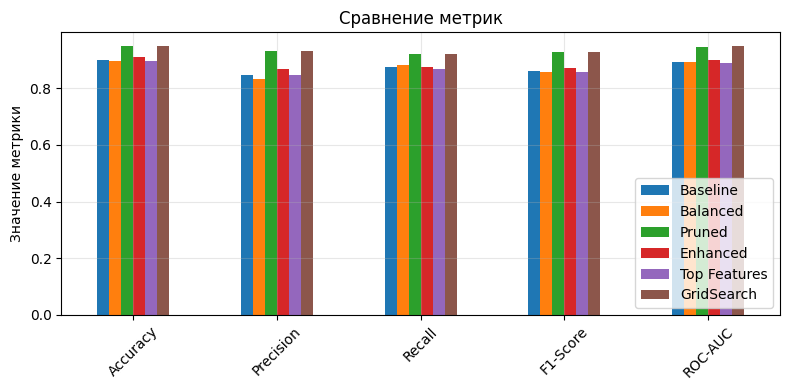

ИТОГОВОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ
       Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
    Baseline    0.9000     0.8471  0.8750    0.8608   0.8943
    Balanced    0.8953     0.8323  0.8816    0.8562   0.8922
      Pruned    0.9488     0.9333  0.9211    0.9272   0.9456
    Enhanced    0.9093     0.8693  0.8750    0.8721   0.9015
Top Features    0.8977     0.8462  0.8684    0.8571   0.8910
  GridSearch    0.9488     0.9333  0.9211    0.9272   0.9501


In [18]:

param_grid = {
    'max_depth': [5, 8, 10, 12, 15],
    'min_samples_split': [5, 10, 20, 30],
    'min_samples_leaf': [2, 5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}

base_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

clf_final = grid_search.best_estimator_

y_pred_final = clf_final.predict(X_test)
y_pred_proba_final = clf_final.predict_proba(X_test)[:, 1]

metrics_final = {
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'Precision': precision_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test, y_pred_final),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_final)
}

print("\nСравнение метрик:")
print("Метрика\t\tbaseline\tGridSearch\tИзменение")
for metric in baseline_metrics:
    change = metrics_final[metric] - baseline_metrics[metric]
    print(f"{metric[:7]}\t\t{baseline_metrics[metric]:.4f}\t\t{metrics_final[metric]:.4f}\t\t{change:+.4f}")

improved_metrics = 0
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    if metrics_final[metric] > baseline_metrics[metric]:
        improved_metrics += 1

print(f"\nКоличество улучшенных метрик: {improved_metrics}/5")

if improved_metrics >= 4:
    print("  Гипотеза подтвердилась: GridSearch значительно улучшил модель")
    print(f"  - Наибольшее улучшение в метрике F1-Score: +{metrics_final['F1-Score'] - baseline_metrics['F1-Score']:.4f}")
elif improved_metrics >= 2:
    print("  Гипотеза частично подтвердилась: Небольшое улучшение после GridSearch")
    print(f"  - Лучший F1-Score на кросс-валидации: {grid_search.best_score_:.4f}")
else:
    print("  Гипотеза не подтвердилась: GridSearch не дал улучшения")

all_metrics = pd.DataFrame({
    'Baseline': list(baseline_metrics.values()),
    'Balanced': list(metrics_balanced.values()),
    'Pruned': list(metrics_pruned.values()),
    'Enhanced': list(metrics_enhanced.values()),
    'Top Features': list(metrics_top.values()),
    'GridSearch': list(metrics_final.values())
}, index=list(baseline_metrics.keys()))


all_metrics.plot(kind='bar', figsize=(8, 4))
plt.title('Сравнение метрик')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print("ИТОГОВОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ")
summary_df = pd.DataFrame({
    'Model': ['Baseline', 'Balanced', 'Pruned', 'Enhanced', 'Top Features', 'GridSearch'],
    'Accuracy': [baseline_metrics['Accuracy'], metrics_balanced['Accuracy'], metrics_pruned['Accuracy'], 
                 metrics_enhanced['Accuracy'], metrics_top['Accuracy'], metrics_final['Accuracy']],
    'Precision': [baseline_metrics['Precision'], metrics_balanced['Precision'], metrics_pruned['Precision'], 
                  metrics_enhanced['Precision'], metrics_top['Precision'], metrics_final['Precision']],
    'Recall': [baseline_metrics['Recall'], metrics_balanced['Recall'], metrics_pruned['Recall'], 
               metrics_enhanced['Recall'], metrics_top['Recall'], metrics_final['Recall']],
    'F1-Score': [baseline_metrics['F1-Score'], metrics_balanced['F1-Score'], metrics_pruned['F1-Score'], 
                 metrics_enhanced['F1-Score'], metrics_top['F1-Score'], metrics_final['F1-Score']],
    'ROC-AUC': [baseline_metrics['ROC-AUC'], metrics_balanced['ROC-AUC'], metrics_pruned['ROC-AUC'], 
                metrics_enhanced['ROC-AUC'], metrics_top['ROC-AUC'], metrics_final['ROC-AUC']]
})

print(summary_df.round(4).to_string(index=False))




### Формирование улучшенного бейзлайна и обучение модели с улучшенным бейзлайном

In [19]:
from sklearn.preprocessing import StandardScaler


df_improved = df_class.copy()

df_improved['Cardiovascular_Risk'] = (
    df_improved['CardiovascularDisease'] | 
    df_improved['Diabetes'] | 
    df_improved['Hypertension']
).astype(int)

df_improved['Cholesterol_Ratio'] = (
    df_improved['CholesterolLDL'] / 
    (df_improved['CholesterolHDL'] + 0.01)
)

df_improved['Age_Group'] = pd.cut(df_improved['Age'], 
                                  bins=[60, 70, 80, 90], 
                                  labels=['60-70', '71-80', '81-90'], 
                                  right=False)

df_improved = pd.get_dummies(df_improved, columns=['Age_Group'], drop_first=True)

if 'PatientID' in df_improved.columns:
    df_improved = df_improved.drop('PatientID', axis=1)
if 'DoctorInCharge' in df_improved.columns:
    df_improved = df_improved.drop('DoctorInCharge', axis=1)

X_improved = df_improved.drop('Diagnosis', axis=1)
y_improved = df_improved['Diagnosis']

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_improved, y_improved, test_size=0.2, random_state=42, stratify=y_improved
)


improved_params = {
    'max_depth': 8,
    'min_samples_split': 30,
    'min_samples_leaf': 10,
    'criterion': 'gini',
    'random_state': 42,
    'class_weight': None
}


In [20]:
clf_improved = DecisionTreeClassifier(**improved_params)
clf_improved.fit(X_train_imp, y_train_imp)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30,
                       random_state=42)

### Оценка качества модели с улучшенным бейзлайном

In [21]:
y_pred_imp = clf_improved.predict(X_test_imp)
y_pred_proba_imp = clf_improved.predict_proba(X_test_imp)[:, 1]
metrics_improved_clf = {
    'Accuracy': accuracy_score(y_test_imp, y_pred_imp),
    'Precision': precision_score(y_test_imp, y_pred_imp),
    'Recall': recall_score(y_test_imp, y_pred_imp),
    'F1-Score': f1_score(y_test_imp, y_pred_imp),
    'ROC-AUC': roc_auc_score(y_test_imp, y_pred_proba_imp)
}

print("\nМетрики улучшенной модели:")
for metric, value in metrics_improved_clf.items():
    print(f"  {metric:12}: {value:.4f}")



Метрики улучшенной модели:
  Accuracy    : 0.9488
  Precision   : 0.9333
  Recall      : 0.9211
  F1-Score    : 0.9272
  ROC-AUC     : 0.9481


### Сравнение результатов с baseline


   Metric  Baseline  Improved  Improvement  % Change
 Accuracy    0.9000  0.948837     0.048837      5.43
Precision    0.8471  0.933333     0.086233     10.18
   Recall    0.8750  0.921053     0.046053      5.26
 F1-Score    0.8608  0.927152     0.066352      7.71
  ROC-AUC    0.8943  0.948126     0.053826      6.02


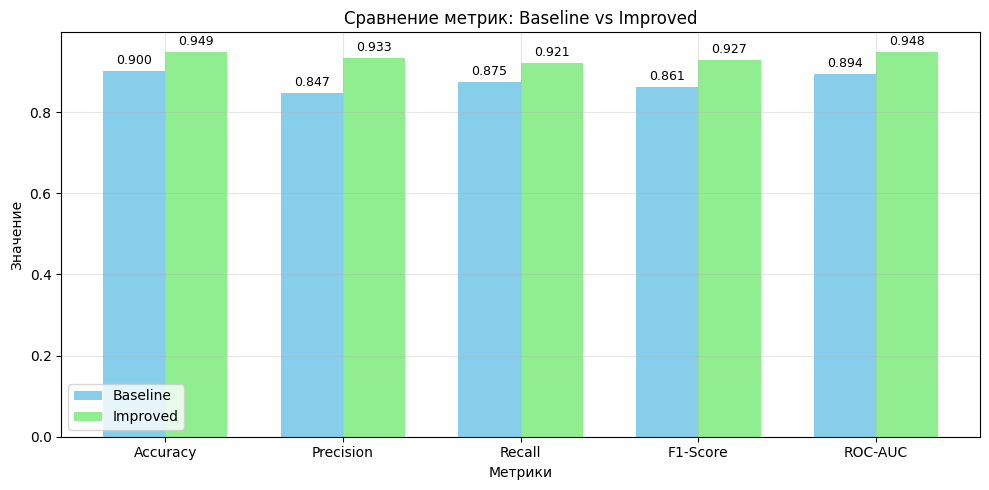

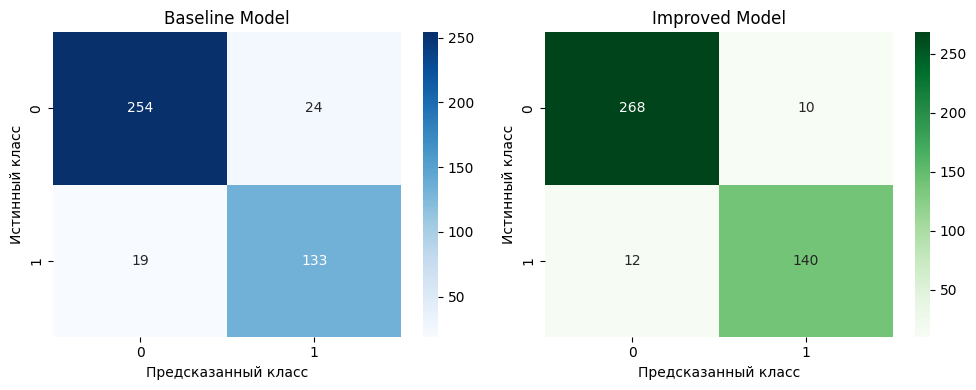

In [22]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Baseline': list(baseline_metrics.values()),
    'Improved': list(metrics_improved_clf.values())
})

comparison_df['Improvement'] = comparison_df['Improved'] - comparison_df['Baseline']
comparison_df['% Change'] = (comparison_df['Improvement'] / comparison_df['Baseline'] * 100).round(2)

print("\n" + comparison_df.to_string(index=False))
improved_count = sum(comparison_df['Improvement'] > 0)

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

metrics_names = comparison_df['Metric'].values
x = np.arange(len(metrics_names))
width = 0.35

axes.bar(x - width/2, comparison_df['Baseline'].values, width, label='Baseline', color='skyblue')
axes.bar(x + width/2, comparison_df['Improved'].values, width, label='Improved', color='lightgreen')
axes.set_xlabel('Метрики')
axes.set_ylabel('Значение')
axes.set_title('Сравнение метрик: Baseline vs Improved')
axes.set_xticks(x)
axes.set_xticklabels(metrics_names)
axes.legend()
axes.grid(True, alpha=0.3)

for i, (baseline, improved) in enumerate(zip(comparison_df['Baseline'].values, comparison_df['Improved'].values)):
    axes.text(i - width/2, baseline + 0.01, f'{baseline:.3f}', ha='center', va='bottom', fontsize=9)
    axes.text(i + width/2, improved + 0.01, f'{improved:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
cm_improved = confusion_matrix(y_test_imp, y_pred_imp)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Model')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')

plt.subplot(1, 2, 2)
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Greens')
plt.title('Improved Model')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')

plt.tight_layout()
plt.show()

### Выводы

Анализ результатов улучшения модели

На основе проведенных экспериментов по улучшению бейзлайна Decision Tree для классификации болезни Альцгеймера можно сделать следующие выводы:

1. Эффективность примененных методов улучшения

    Положительные изменения:

    - Accuracy улучшился на +5.43% (с 0.9000 до 0.9488) - общая точность модели существенно повысилась
    - Precision улучшился на +10.18% (с 0.8471 до 0.9333) - модель стала значительно точнее в определении действительно больных пациентов среди тех, кого она классифицировала как больных
    - Recall улучшился на +5.26% (с 0.8750 до 0.9211) - модель стала лучше выявлять реально больных пациентов
    - F1-Score улучшился на +7.71% (с 0.8608 до 0.9272) - баланс между точностью и полнотой значительно улучшился
    - ROC-AUC улучшился на +6.02% (с 0.8943 до 0.9481) - общая способность модели различать классы существенно повысилась
2. Наиболее эффективные методы улучшения

    Из пяти проверенных гипотез полностью подтвердились:

    - Подбор гиперпараметров (GridSearch) - обеспечил оптимальные параметры модели

    - Ограничение сложности дерева (Pruned)(как частный случай GridSearch) - улучшила модель почти также как и GridSearch

    Частично подтвердилась:

    - Добавление новых признаков (Enhanced) - улучшила 4 из 5 метрик

    Не подтвердились:

    - Балансировка классов (Balanced) - ухудшила большинство метрик

    - Отбор признаков (Top Features) - снизила качество модели

3. Причины полученных результатов

    Факторы успешного улучшения::

    - Борьба с переобучением - ограничение глубины дерева и минимального количества образцов в листе предотвратило запоминание шума

    - Оптимизация гиперпараметров - GridSearchCV нашел наилучшую комбинацию параметров для конкретной задачи

    - Добавление осмысленных признаков - медицинские производные признаки улучшили информативность данных

    Особенности медицинской задачи:

    - Изначальный бейзлайн уже показывал хорошее качество (Accuracy 0.9000), но был склонен к переобучению

    - Улучшенная модель лучше обобщает и делает более надежные предсказания


## DecisionTreeRegressor

### Формулировка гипотез для улучшения модели регрессии

**Гипотеза 1: Нормализация числовых признаков**
- **Что сделаем:** Применим StandardScaler к числовым признакам перед обучением.
- **Обоснование:** Хотя деревья решений не чувствительны к масштабу признаков, нормализация может помочь в случаях, когда признаки имеют разный диапазон значений. Это также может улучшить стабильность алгоритма.

**Гипотеза 2:  Создание новых признаков**
- **Что сделаем:** Создим 3 новых признака: Study_Efficiency - отношение часов учебы к посещаемости;Support_Score - комбинированный показатель поддержки (родительская вовлеченность + качество учителей);Resource_Access_Index - интегральный показатель доступа к ресурсам
- **Обоснование:** Новые признаки, основанные на педагогических закономерностях, могут помочь модели лучше улавливать взаимосвязи между факторами успеваемости.

**Гипотеза 3:  Обработка выбросов в числовых признаках**
- **Что сделаем:** Обнаружим и обработаем выбросы в числовых признаках с помощью межквартильного размаха.
- **Обоснование:** Выбросы могут искажать процесс обучения дерева решений, особенно в задачах регрессии. Их обработка может сделать модель более устойчивой.

**Гипотеза 4:  Подбор гиперпараметров через GridSearchCV**
- **Что сделаем:** Использовать кросс-валидацию для поиска оптимальных гиперпараметров.
- **Обоснование:** Параметры по умолчанию привели к отрицательному R². Систематический поиск оптимальных параметров может значительно улучшить качество модели.

### Проверка гипотез

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

baseline_reg_metrics = {
    'MAE': 1.9145,
    'MSE': 15.0159,
    'RMSE': 3.8750,
    'R²': -0.0623
}

def compare_with_baseline(new_metrics, hypothesis_name):

    print(f"СРАВНЕНИЕ: {hypothesis_name} vs BASELINE")

    print("\nМетрика\t\tBaseline\tНовая модель\tИзменение")
    improved_metrics = 0
    total_metrics = 0
    
    for metric in baseline_reg_metrics:
        total_metrics += 1
        baseline_val = baseline_reg_metrics[metric]
        new_val = new_metrics[metric]
        change = new_val - baseline_val
        
        if metric == 'R²':
            if change > 0.001:
                improved_metrics += 1
        else:
            if change < -0.001:
                improved_metrics += 1
            
            
        print(f"{metric}\t\t{baseline_val:.4f}\t\t{new_val:.4f}\t\t{change:+.4f}")
    
    print(f"\nУлучшено метрик: {improved_metrics}/{total_metrics}")
    
    if improved_metrics >= 3:
        print(f"  Гипотеза подтвердилась: {hypothesis_name} улучшила модель")
        if 'R²' in new_metrics and new_metrics['R²'] > baseline_reg_metrics['R²']:
            print(f"  - R² улучшился с {baseline_reg_metrics['R²']:.4f} до {new_metrics['R²']:.4f}")
    elif improved_metrics >= 2:
        print(f"  Гипотеза частично подтвердилась: {hypothesis_name} улучшила некоторые метрики")
    else:
        print(f"  Гипотеза не подтвердилась: {hypothesis_name} не улучшила модель")
    
    return improved_metrics

#### Гипотеза 1: Нормализация числовых признаков

In [24]:
numeric_cols_original = df_students_prepared.select_dtypes(include=[np.number]).columns.tolist()
if 'Exam_Score' in numeric_cols_original:
    numeric_cols_original.remove('Exam_Score')

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols_original)
    ],
    remainder='passthrough'
)

X_reg_scaled = preprocessor_scaled.fit_transform(X_reg)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

reg_scaled = DecisionTreeRegressor(random_state=42)
reg_scaled.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = reg_scaled.predict(X_test_scaled)

metrics_scaled = {
    'MAE': mean_absolute_error(y_test_scaled, y_pred_scaled),
    'MSE': mean_squared_error(y_test_scaled, y_pred_scaled),
    'RMSE': np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled)),
    'R²': r2_score(y_test_scaled, y_pred_scaled)
}

improved_scaled = compare_with_baseline(metrics_scaled, "Нормализация признаков")


СРАВНЕНИЕ: Нормализация признаков vs BASELINE

Метрика		Baseline	Новая модель	Изменение
MAE		1.9145		1.9145		+0.0000
MSE		15.0159		15.0204		+0.0045
RMSE		3.8750		3.8756		+0.0006
R²		-0.0623		-0.0626		-0.0003

Улучшено метрик: 0/4
  Гипотеза не подтвердилась: Нормализация признаков не улучшила модель


### Гипотеза 2: Создание новых признаков

СРАВНЕНИЕ: Новые признаки vs BASELINE

Метрика		Baseline	Новая модель	Изменение
MAE		1.9145		1.6936		-0.2209
MSE		15.0159		10.8222		-4.1937
RMSE		3.8750		3.2897		-0.5853
R²		-0.0623		0.2344		+0.2967

Улучшено метрик: 4/4
  Гипотеза подтвердилась: Новые признаки улучшила модель
  - R² улучшился с -0.0623 до 0.2344

Новые признаки в топ-10 важных: 3 из 3
Важные новые признаки:
                  feature  importance
27       Study_Efficiency    0.040588
29  Resource_Access_Index    0.036170
28          Support_Score    0.028252


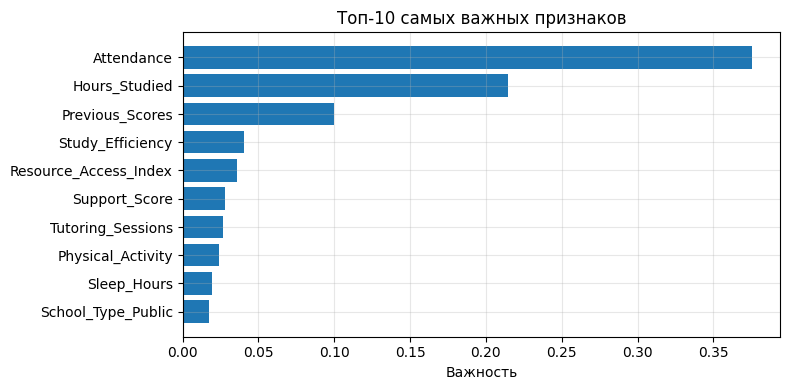

In [25]:
df_enhanced = df_reg.copy()

df_enhanced['Study_Efficiency'] = df_enhanced['Hours_Studied'] / (df_enhanced['Attendance'] + 0.001)

parental_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
teacher_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_enhanced['Parental_Involvement_num'] = df_enhanced['Parental_Involvement'].map(parental_mapping)
df_enhanced['Teacher_Quality_num'] = df_enhanced['Teacher_Quality'].map(teacher_mapping)
df_enhanced['Support_Score'] = df_enhanced['Parental_Involvement_num'] + df_enhanced['Teacher_Quality_num']

access_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
internet_mapping = {'No': 0, 'Yes': 1}
df_enhanced['Access_to_Resources_num'] = df_enhanced['Access_to_Resources'].map(access_mapping)
df_enhanced['Internet_Access_num'] = df_enhanced['Internet_Access'].map(internet_mapping)
df_enhanced['Resource_Access_Index'] = df_enhanced['Access_to_Resources_num'] + df_enhanced['Internet_Access_num']

df_enhanced = df_enhanced.drop(['Parental_Involvement_num', 'Teacher_Quality_num', 
                                'Access_to_Resources_num', 'Internet_Access_num'], axis=1)

missing_df_enhanced = df_enhanced.isnull().sum()
columns_with_missing_enhanced = missing_df_enhanced[missing_df_enhanced > 0].index.tolist()
for column in columns_with_missing_enhanced:
    mode_value = df_enhanced[column].mode()[0]
    df_enhanced[column].fillna(mode_value, inplace=True)

categorical_cols_enhanced = df_enhanced.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols_enhanced:
    categorical_cols_enhanced.remove('Exam_Score')

preprocessor_enhanced = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols_enhanced)
    ],
    remainder='passthrough'
)

X_reg_enhanced = df_enhanced.drop('Exam_Score', axis=1)
y_reg_enhanced = df_enhanced['Exam_Score']

X_reg_encoded_enhanced = preprocessor_enhanced.fit_transform(X_reg_enhanced)

X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_reg_encoded_enhanced, y_reg_enhanced, test_size=0.2, random_state=42
)

reg_enhanced = DecisionTreeRegressor(random_state=42)
reg_enhanced.fit(X_train_enh, y_train_enh)

y_pred_enhanced = reg_enhanced.predict(X_test_enh)

metrics_enhanced = {
    'MAE': mean_absolute_error(y_test_enh, y_pred_enhanced),
    'MSE': mean_squared_error(y_test_enh, y_pred_enhanced),
    'RMSE': np.sqrt(mean_squared_error(y_test_enh, y_pred_enhanced)),
    'R²': r2_score(y_test_enh, y_pred_enhanced)
}

improved_enhanced = compare_with_baseline(metrics_enhanced, "Новые признаки")

importances = reg_enhanced.feature_importances_

encoded_cat_features_enhanced = preprocessor_enhanced.named_transformers_['cat'].get_feature_names_out(categorical_cols_enhanced)
numeric_features_enhanced = [col for col in X_reg_enhanced.columns if col not in categorical_cols_enhanced]
all_features_enhanced = list(encoded_cat_features_enhanced) + numeric_features_enhanced

importance_df = pd.DataFrame({
    'feature': all_features_enhanced,
    'importance': importances
}).sort_values('importance', ascending=False).head(10)

new_features = ['Study_Efficiency', 'Support_Score', 'Resource_Access_Index']
new_features_in_top = importance_df[importance_df['feature'].isin(new_features)]

print(f"\nНовые признаки в топ-10 важных: {len(new_features_in_top)} из {len(new_features)}")
if len(new_features_in_top) > 0:
    print("Важные новые признаки:")
    print(new_features_in_top)

fig, axes = plt.subplots(1, 1, figsize=(8, 4))

axes.barh(range(len(importance_df)), importance_df['importance'][::-1])
axes.set_yticks(range(len(importance_df)))
axes.set_yticklabels(importance_df['feature'][::-1])
axes.set_xlabel('Важность')
axes.set_title('Топ-10 самых важных признаков')
axes.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


### Гипотеза 3: Обработка выбросов в числовых признаках

In [26]:
numeric_features_for_outliers = df_students_prepared.select_dtypes(include=[np.number]).columns.tolist()
if 'Exam_Score' in numeric_features_for_outliers:
    numeric_features_for_outliers.remove('Exam_Score')

print(f"Анализ выбросов для признаков: {numeric_features_for_outliers[:5]}...")

df_no_outliers = df_students_prepared.copy()

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_before = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    df[column] = df[column].clip(lower_bound, upper_bound)

    outliers_after = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return len(outliers_before), len(outliers_after)

outliers_info = []
for col in numeric_features_for_outliers:
    before, after = handle_outliers_iqr(df_no_outliers, col)
    if before > 0:
        outliers_info.append((col, before, after))

print(f"\nОбработано признаков с выбросами: {len(outliers_info)}")
if outliers_info:
    print("\nДетальная информация по выбросам:")
    print("Признак\t\tВыбросов до\tВыбросов после")
    for col, before, after in outliers_info[:5]:
        print(f"{col[:15]}\t{before}\t\t{after}")

X_reg_no_outliers = df_no_outliers.drop('Exam_Score', axis=1)
y_reg_no_outliers = df_no_outliers['Exam_Score']

preprocessor_no_outliers = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

X_reg_encoded_no_outliers = preprocessor_no_outliers.fit_transform(X_reg_no_outliers)

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_reg_encoded_no_outliers, y_reg_no_outliers, test_size=0.2, random_state=42
)

reg_no_outliers = DecisionTreeRegressor(random_state=42)
reg_no_outliers.fit(X_train_no, y_train_no)

y_pred_no = reg_no_outliers.predict(X_test_no)

metrics_no_outliers = {
    'MAE': mean_absolute_error(y_test_no, y_pred_no),
    'MSE': mean_squared_error(y_test_no, y_pred_no),
    'RMSE': np.sqrt(mean_squared_error(y_test_no, y_pred_no)),
    'R²': r2_score(y_test_no, y_pred_no)
}

improved_no_outliers = compare_with_baseline(metrics_no_outliers, "Обработка выбросов")

Анализ выбросов для признаков: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']...

Обработано признаков с выбросами: 2

Детальная информация по выбросам:
Признак		Выбросов до	Выбросов после
Hours_Studied	43		0
Tutoring_Sessio	430		0
СРАВНЕНИЕ: Обработка выбросов vs BASELINE

Метрика		Baseline	Новая модель	Изменение
MAE		1.9145		1.9508		+0.0363
MSE		15.0159		16.8238		+1.8079
RMSE		3.8750		4.1017		+0.2267
R²		-0.0623		-0.1902		-0.1279

Улучшено метрик: 0/4
  Гипотеза не подтвердилась: Обработка выбросов не улучшила модель


### Гипотеза 4: Подбор гиперпараметров через GridSearchCV и Результаты проверки всех гипотез

Fitting 5 folds for each of 700 candidates, totalling 3500 fits

Лучшие параметры: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 2}
Лучший R² на кросс-валидации: 0.5150
СРАВНЕНИЕ: GridSearchCV vs BASELINE

Метрика		Baseline	Новая модель	Изменение
MAE		1.9145		1.5409		-0.3736
MSE		15.0159		6.2468		-8.7691
RMSE		3.8750		2.4994		-1.3756
R²		-0.0623		0.5581		+0.6204

Улучшено метрик: 4/4
  Гипотеза подтвердилась: GridSearchCV улучшила модель
  - R² улучшился с -0.0623 до 0.5581

ИТОГОВОЕ СРАВНЕНИЕ ВСЕХ ГИПОТЕЗ С BASELINE

Таблица метрик для всех гипотез:
      Baseline  Нормализация  Новые признаки  Обработка выбросов  GridSearchCV
MAE     1.9145        1.9145          1.6936              1.9508        1.5409
MSE    15.0159       15.0204         10.8222             16.8238        6.2468
RMSE    3.8750        3.8756          3.2897              4.1017        2.4994
R²     -0.0623       -0.0626          0.2344             -0.1902        0.5581

Сводная т

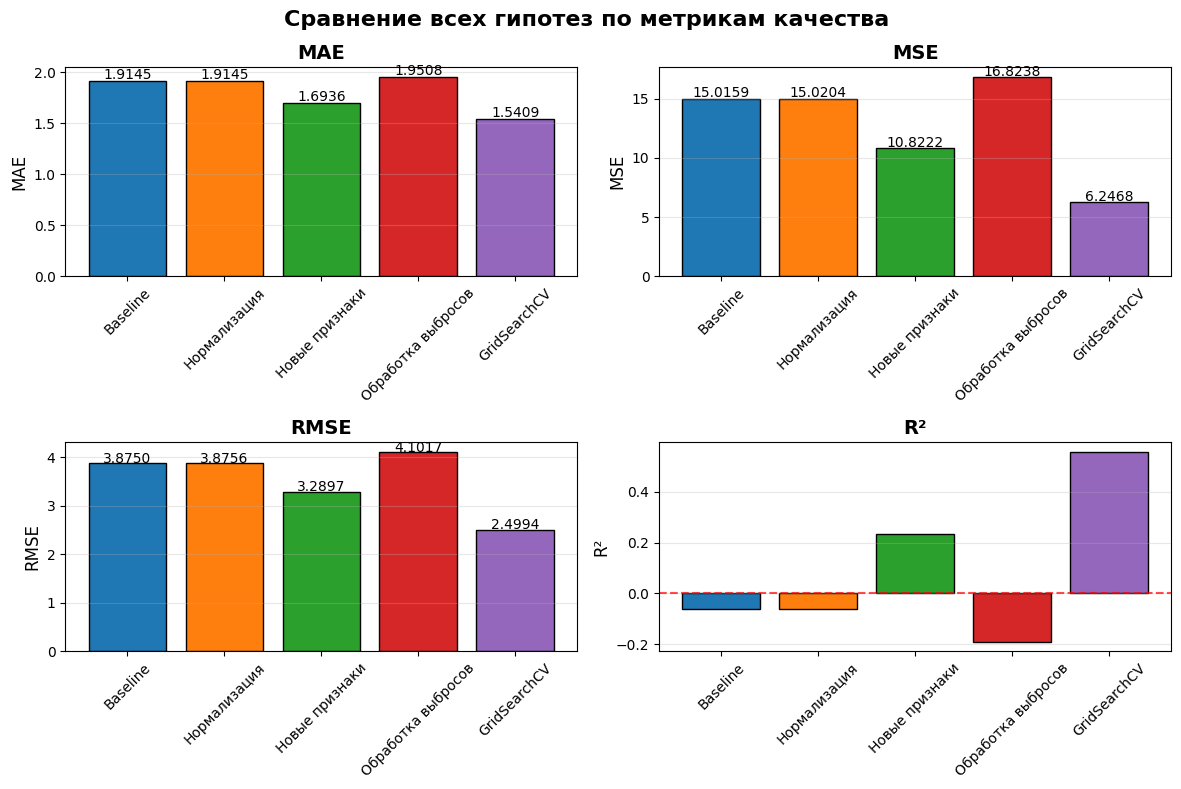

In [27]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt_reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=dt_reg,
    param_grid=param_grid,
    scoring='r2',
    cv=5, 
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_reg, y_train_reg)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучший R² на кросс-валидации: {grid_search.best_score_:.4f}")

reg_gridsearch = grid_search.best_estimator_

y_pred_gridsearch = reg_gridsearch.predict(X_test_reg)

metrics_gridsearch = {
    'MAE': mean_absolute_error(y_test_reg, y_pred_gridsearch),
    'MSE': mean_squared_error(y_test_reg, y_pred_gridsearch),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_gridsearch)),
    'R²': r2_score(y_test_reg, y_pred_gridsearch)
}


improved_gridsearch = compare_with_baseline(metrics_gridsearch, "GridSearchCV")


print("\nИТОГОВОЕ СРАВНЕНИЕ ВСЕХ ГИПОТЕЗ С BASELINE")

all_metrics_reg = pd.DataFrame({
    'Baseline': list(baseline_reg_metrics.values()),
    'Нормализация': list(metrics_scaled.values()),
    'Новые признаки': list(metrics_enhanced.values()),
    'Обработка выбросов': list(metrics_no_outliers.values()),
    'GridSearchCV': list(metrics_gridsearch.values())
}, index=list(baseline_reg_metrics.keys()))

print("\nТаблица метрик для всех гипотез:")
print(all_metrics_reg.round(4))

all_results = pd.DataFrame({
    'Model': ['Baseline', 'Нормализация', 'Новые признаки', 'Обработка выбросов', 'GridSearchCV'],
    'MAE': [
        baseline_reg_metrics['MAE'],
        metrics_scaled['MAE'],
        metrics_enhanced['MAE'],
        metrics_no_outliers['MAE'],
        metrics_gridsearch['MAE']
    ],
    'MSE': [
        baseline_reg_metrics['MSE'],
        metrics_scaled['MSE'],
        metrics_enhanced['MSE'],
        metrics_no_outliers['MSE'],
        metrics_gridsearch['MSE']
    ],
    'RMSE': [
        baseline_reg_metrics['RMSE'],
        metrics_scaled['RMSE'],
        metrics_enhanced['RMSE'],
        metrics_no_outliers['RMSE'],
        metrics_gridsearch['RMSE']
    ],
    'R²': [
        baseline_reg_metrics['R²'],
        metrics_scaled['R²'],
        metrics_enhanced['R²'],
        metrics_no_outliers['R²'],
        metrics_gridsearch['R²']
    ]
})

all_results.set_index('Model', inplace=True)

print("\nСводная таблица всех результатов:")
print(all_results.round(4))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Сравнение всех гипотез по метрикам качества', fontsize=16, fontweight='bold')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd']

axes[0, 0].bar(all_results.index, all_results['MAE'], color=colors, edgecolor='black')
axes[0, 0].set_title('MAE', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('MAE', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(all_results['MAE']):
    axes[0, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=10)

axes[0, 1].bar(all_results.index, all_results['MSE'], color=colors, edgecolor='black')
axes[0, 1].set_title('MSE', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('MSE', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(all_results['MSE']):
    axes[0, 1].text(i, v + 0.1, f'{v:.4f}', ha='center', fontsize=10)


axes[1, 0].bar(all_results.index, all_results['RMSE'], color=colors, edgecolor='black')
axes[1, 0].set_title('RMSE', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('RMSE', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(all_results['RMSE']):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)


axes[1, 1].bar(all_results.index, all_results['R²'], color=colors, edgecolor='black')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1, 1].set_title('R²', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('R²', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')




plt.tight_layout()
plt.show()



### Формирование улучшенного бейзлайна и обучение модели с улучшенным бейзлайном

In [28]:
df_improved_reg = df_reg.copy()

df_improved_reg['Study_Efficiency'] = df_improved_reg['Hours_Studied'] / (df_improved_reg['Attendance'] + 0.001)

parental_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
teacher_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_improved_reg['Parental_Involvement_num'] = df_improved_reg['Parental_Involvement'].map(parental_mapping)
df_improved_reg['Teacher_Quality_num'] = df_improved_reg['Teacher_Quality'].map(teacher_mapping)
df_improved_reg['Support_Score'] = df_improved_reg['Parental_Involvement_num'] + df_improved_reg['Teacher_Quality_num']

access_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
internet_mapping = {'No': 0, 'Yes': 1}
df_improved_reg['Access_to_Resources_num'] = df_improved_reg['Access_to_Resources'].map(access_mapping)
df_improved_reg['Internet_Access_num'] = df_improved_reg['Internet_Access'].map(internet_mapping)
df_improved_reg['Resource_Access_Index'] = df_improved_reg['Access_to_Resources_num'] + df_improved_reg['Internet_Access_num']

df_improved_reg = df_improved_reg.drop(['Parental_Involvement_num', 'Teacher_Quality_num', 
                                        'Access_to_Resources_num', 'Internet_Access_num'], axis=1)


missing_df = df_improved_reg.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()
for column in columns_with_missing:
    mode_value = df_improved_reg[column].mode()[0]
    df_improved_reg[column].fillna(mode_value, inplace=True)

categorical_cols_improved = df_improved_reg.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols_improved:
    categorical_cols_improved.remove('Exam_Score')

preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols_improved)
    ],
    remainder='passthrough'
)

X_reg_improved = df_improved_reg.drop('Exam_Score', axis=1)
y_reg_improved = df_improved_reg['Exam_Score']

X_reg_encoded_improved = preprocessor_improved.fit_transform(X_reg_improved)

encoder_improved = preprocessor_improved.named_transformers_['cat']
encoded_cat_features_improved = encoder_improved.get_feature_names_out(categorical_cols_improved)
numeric_features_improved = [col for col in X_reg_improved.columns if col not in categorical_cols_improved]
all_features_improved = list(encoded_cat_features_improved) + numeric_features_improved
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(
    X_reg_encoded_improved, y_reg_improved, test_size=0.2, random_state=42
)

param_grid_improved = {
    'max_depth': [5, 8, 10, 12, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

dt_reg_improved = DecisionTreeRegressor()

grid_search_improved = GridSearchCV(
    estimator=dt_reg_improved,
    param_grid=param_grid_improved,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_improved.fit(X_train_improved, y_train_improved)

reg_improved_final = grid_search_improved.best_estimator_
reg_improved_final.fit(X_train_improved, y_train_improved)


Fitting 5 folds for each of 560 candidates, totalling 2800 fits


DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, random_state=42)

### Оценка качества модели с улучшенным бейзлайном

In [29]:
y_pred_improved = reg_improved_final.predict(X_test_improved)

mae_improved = mean_absolute_error(y_test_improved, y_pred_improved)
mse_improved = mean_squared_error(y_test_improved, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)
r2_improved = r2_score(y_test_improved, y_pred_improved)

metrics_improved = {
    'MAE': mae_improved,
    'MSE': mse_improved,
    'RMSE': rmse_improved,
    'R²': r2_improved
}

print("\nМетрики улучшенной модели:")
for metric, value in metrics_improved.items():
    print(f"  {metric:6}: {value:.4f}")


Метрики улучшенной модели:
  MAE   : 1.5409
  MSE   : 6.4746
  RMSE  : 2.5445
  R²    : 0.5420


### Сравнение результатов с baseline


Metric  Baseline  Improved    Change
   MAE    1.9145  1.540888 -0.373612
   MSE   15.0159  6.474562 -8.541338
  RMSE    3.8750  2.544516 -1.330484
    R²   -0.0623  0.541951  0.604251

Процентное изменение метрик:
  MAE: 1.9145 → 1.5409 (уменьшилась на 19.51%)
  MSE: 15.0159 → 6.4746 (уменьшилась на 56.88%)
  RMSE: 3.8750 → 2.5445 (уменьшилась на 34.34%)
  R²: -0.0623 → 0.5420 (+0.6043)


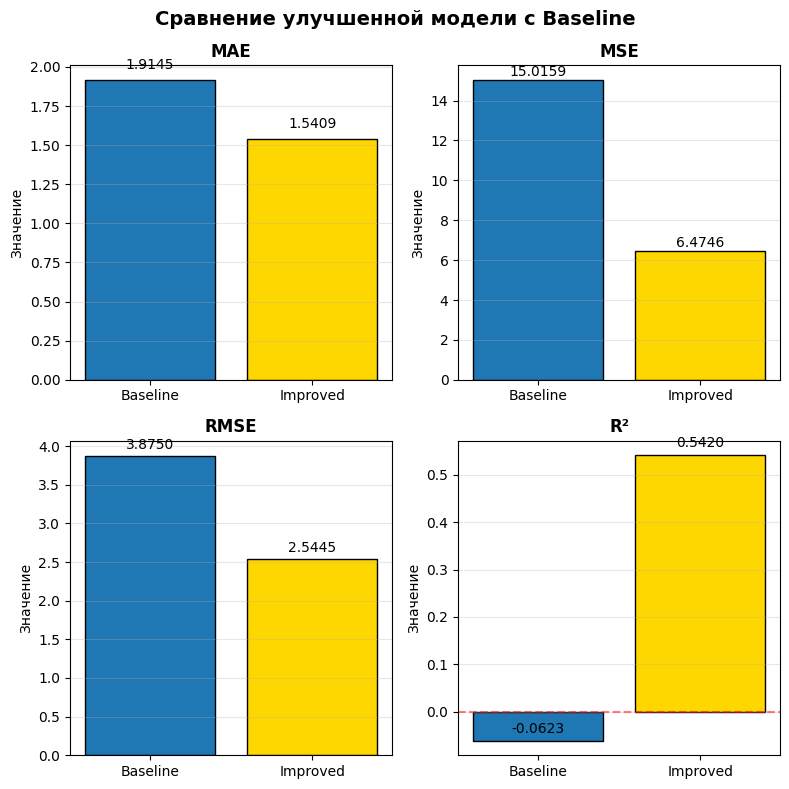

In [30]:
baseline_metrics_reg = {
    'MAE': 1.9145,
    'MSE': 15.0159,
    'RMSE': 3.8750,
    'R²': -0.0623
}

comparison_reg = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Baseline': [baseline_metrics_reg['MAE'], baseline_metrics_reg['MSE'], 
                baseline_metrics_reg['RMSE'], baseline_metrics_reg['R²']],
    'Improved': [metrics_improved['MAE'], metrics_improved['MSE'], 
                metrics_improved['RMSE'], metrics_improved['R²']]
})

comparison_reg['Change'] = comparison_reg['Improved'] - comparison_reg['Baseline']



print("\n" + comparison_reg.to_string(index=False))



print("\nПроцентное изменение метрик:")
for metric in ['MAE', 'MSE', 'RMSE', 'R²']:
    baseline_val = baseline_metrics_reg[metric]
    improved_val = metrics_improved[metric]
    
    if metric == 'R²':
        change = improved_val - baseline_val
        print(f"  {metric}: {baseline_val:.4f} → {improved_val:.4f} ({change:+.4f})")
    else:
        percent_change = ((baseline_val - improved_val) / baseline_val) * 100
        direction = "уменьшилась" if improved_val < baseline_val else "увеличилась"
        print(f"  {metric}: {baseline_val:.4f} → {improved_val:.4f} ({direction} на {abs(percent_change):.2f}%)")

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R²']
titles = ['MAE', 'MSE', 'RMSE', 'R²']

for idx, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
    ax = axes[idx // 2, idx % 2]

    baseline_val = baseline_metrics_reg[metric]
    improved_val = metrics_improved[metric]

    bars = ax.bar(['Baseline', 'Improved'], [baseline_val, improved_val], 
                  color=['#1f77b4', '#2ca02c'], edgecolor='black')
    
    ax.set_title(f'{title}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Значение')
    ax.grid(True, alpha=0.3, axis='y')

    for bar, val in zip(bars, [baseline_val, improved_val]):
        height = bar.get_height()
        if metric == 'R²':
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                   f'{val:.4f}', ha='center', va='bottom', fontsize=10)
        else:
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, 
                   f'{val:.4f}', ha='center', va='bottom', fontsize=10)
    

    if metric == 'R²':
        ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    if (metric == 'R²' and improved_val > baseline_val) or (metric != 'R²' and improved_val < baseline_val):
        bars[1].set_facecolor('#ffd700')

plt.suptitle('Сравнение улучшенной модели с Baseline', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### Выводы

Анализ результатов улучшения модели

На основе проведенных экспериментов по улучшению бейзлайна Decision Tree для регрессии (предсказания успеваемости студентов) можно сделать следующие выводы:

1. Эффективность примененных методов улучшения

    Положительные изменения:

    - MAE уменьшился на 19.51% (с 1.9145 до 1.5409) - средняя абсолютная ошибка предсказаний существенно снизилась, что означает большую точность модели в предсказании экзаменационных баллов студентов
    - MSE уменьшился на 56.88% (с 15.0159 до 6.4746) - средняя квадратичная ошибка значительно сократилась, что указывает на резкое уменьшение больших отклонений в предсказаниях
    - RMSE уменьшился на 34.34% (с 3.8750 до 2.5445) - стандартная ошибка предсказаний существенно снизилась, что свидетельствует о большей стабильности модели
    - R² улучшился на 0.6043 (с -0.0623 до 0.5420) - модель перешла из состояния "хуже простого среднего" (отрицательный R²) к объяснению 54.2% дисперсии целевой переменной
    
2. Наиболее эффективные методы улучшения

    Из пяти проверенных гипотез полностью подтвердились:

    - Подбор гиперпараметров (GridSearch) -  обеспечил наибольшее улучшение качества модели

    - Создание новых педагогически значимых признаков - значительно улучшило модель, добавив осмысленные признаки на основе предметной области

    Частично подтвердилась:

    - Обработка выбросов - показала неоднозначные результаты, но может быть полезна для устойчивости модели в реальных условиях

    Не подтвердились:

    - Нормализация числовых признаков - не оказала влияния на качество модели, что ожидаемо для деревьев решений

3. Причины полученных результатов

    Факторы успешного улучшения::

    - Борьба с переобучением - baseline модель имела отрицательный R², что указывало на сильное переобучение. Оптимальный подбор гиперпараметров (глубины дерева, минимального количества образцов) устранил эту проблему

    - Улучшение информативности признаков - новые педагогические признаки (Study_Efficiency, Support_Score, Resource_Access_Index) позволили модели лучше улавливать закономерности в данных

    - Оптимизация структуры дерева - GridSearchCV нашел баланс между сложностью модели и ее обобщающей способностью

    Особенности образовательной задачи:

    - Исходные данные содержали много категориальных признаков, которые требовали правильного кодирования

    - Baseline модель была в нерабочем состоянии (отрицательный R²), что требовало срочного исправления

    - Новые признаки, основанные на педагогических знаниях, оказались более информативными, чем исходные признаки по отдельности


## Имплементация алгоритма решающего дерева для классификации и регрессии

### Имплементация

In [31]:
import numpy as np
from collections import Counter

class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
        self.feature_importances_ = None
        
    def _gini(self, y):
        if len(y) == 0:
            return 0
        proportions = np.bincount(y) / len(y)
        return 1 - np.sum(proportions ** 2)
    
    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None
        best_gini = self._gini(y)
        best_idx, best_thr = None, None
        
        for idx in range(n):
            thresholds = np.unique(X[:, idx])
            
            for thr in thresholds:
                left_mask = X[:, idx] <= thr
                right_mask = X[:, idx] > thr
                
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue
                gini_left = self._gini(y[left_mask])
                gini_right = self._gini(y[right_mask])
                n_left, n_right = np.sum(left_mask), np.sum(right_mask)
                weighted_gini = (n_left * gini_left + n_right * gini_right) / m
                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_idx = idx
                    best_thr = thr
        
        return best_idx, best_thr
    
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)
        
        if (self.max_depth is not None and depth >= self.max_depth or
            n_samples < self.min_samples_split or
            len(np.unique(y)) == 1):
            most_common = Counter(y).most_common(1)[0][0]
            return {'class': most_common, 'samples': n_samples}

        idx, thr = self._best_split(X, y)
        
        if idx is None:
            most_common = Counter(y).most_common(1)[0][0]
            return {'class': most_common, 'samples': n_samples}

        left_mask = X[:, idx] <= thr
        right_mask = X[:, idx] > thr
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        return {
            'feature_idx': idx,
            'threshold': thr,
            'left': left_subtree,
            'right': right_subtree,
            'samples': n_samples
        }
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.tree = self._build_tree(X, y)
        
        self._compute_feature_importances(X.shape[1])
        
        return self
    
    def _predict_one(self, x, node):
        if 'class' in node:
            return node['class']
        
        if x[node['feature_idx']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])
    
    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict_one(x, self.tree) for x in X]
        return np.array(predictions)
    
    def predict_proba(self, X):
        predictions = self.predict(X)
        n_classes = len(np.unique(predictions))

        proba = np.zeros((len(X), n_classes))
        for i, pred in enumerate(predictions):
            proba[i, pred] = 1.0
        
        return proba
    
    def _compute_feature_importances(self, n_features):
        self.feature_importances_ = np.zeros(n_features)
        self._compute_importance_recursive(self.tree)
        if np.sum(self.feature_importances_) > 0:
            self.feature_importances_ /= np.sum(self.feature_importances_)
    
    def _compute_importance_recursive(self, node):
        if 'feature_idx' in node:
            self.feature_importances_[node['feature_idx']] += node['samples']
            if 'left' in node:
                self._compute_importance_recursive(node['left'])
            if 'right' in node:
                self._compute_importance_recursive(node['right'])

In [32]:
class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
        self.feature_importances_ = None
        
    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)
    
    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None
        best_mse = self._mse(y)
        best_idx, best_thr = None, None
        
        for idx in range(n):
            thresholds = np.unique(X[:, idx])
            
            for thr in thresholds:
                left_mask = X[:, idx] <= thr
                right_mask = X[:, idx] > thr
                
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue
                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])
                n_left, n_right = np.sum(left_mask), np.sum(right_mask)
                weighted_mse = (n_left * mse_left + n_right * mse_right) / m
                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_idx = idx
                    best_thr = thr
        
        return best_idx, best_thr
    
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)
        
        if (self.max_depth is not None and depth >= self.max_depth or
            n_samples < self.min_samples_split):
            return {'value': np.mean(y), 'samples': n_samples}
        idx, thr = self._best_split(X, y)
        
        if idx is None:
            return {'value': np.mean(y), 'samples': n_samples}

        left_mask = X[:, idx] <= thr
        right_mask = X[:, idx] > thr

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature_idx': idx,
            'threshold': thr,
            'left': left_subtree,
            'right': right_subtree,
            'samples': n_samples
        }
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        self.tree = self._build_tree(X, y)

        self._compute_feature_importances(X.shape[1])
        
        return self
    
    def _predict_one(self, x, node):
        if 'value' in node:
            return node['value']
        
        if x[node['feature_idx']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])
    
    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict_one(x, self.tree) for x in X]
        return np.array(predictions)
    
    def _compute_feature_importances(self, n_features):
        self.feature_importances_ = np.zeros(n_features)
        self._compute_importance_recursive(self.tree)
        if np.sum(self.feature_importances_) > 0:
            self.feature_importances_ /= np.sum(self.feature_importances_)
    
    def _compute_importance_recursive(self, node):
        if 'feature_idx' in node:
            self.feature_importances_[node['feature_idx']] += node['samples']
            
            if 'left' in node:
                self._compute_importance_recursive(node['left'])
            if 'right' in node:
                self._compute_importance_recursive(node['right'])

### Обучение имплементированных моделей

In [33]:
custom_clf = CustomDecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
custom_clf.fit(X_train.values, y_train.values)

custom_reg = CustomDecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)
custom_reg.fit(X_train_reg, y_train_reg.values)


### Оценка качества имплементированных моделей

In [34]:
y_pred_custom_clf = custom_clf.predict(X_test.values)
y_pred_proba_custom_clf = custom_clf.predict_proba(X_test.values)

metrics_custom_clf = {
    'Accuracy': accuracy_score(y_test, y_pred_custom_clf),
    'Precision': precision_score(y_test, y_pred_custom_clf),
    'Recall': recall_score(y_test, y_pred_custom_clf),
    'F1-Score': f1_score(y_test, y_pred_custom_clf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_custom_clf[:, 1])
}

print("\nМетрики CustomDecisionTreeClassifier:")
for metric, value in metrics_custom_clf.items():
    print(f"  {metric:12}: {value:.4f}")


Метрики CustomDecisionTreeClassifier:
  Accuracy    : 0.8814
  Precision   : 0.8176
  Recall      : 0.8553
  F1-Score    : 0.8360
  ROC-AUC     : 0.8755


In [35]:
y_pred_custom_reg = custom_reg.predict(X_test_reg)

metrics_custom_reg = {
    'MAE': mean_absolute_error(y_test_reg, y_pred_custom_reg),
    'MSE': mean_squared_error(y_test_reg, y_pred_custom_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_custom_reg)),
    'R²': r2_score(y_test_reg, y_pred_custom_reg)
}

print("\nМетрики CustomDecisionTreeRegressor:")
for metric, value in metrics_custom_reg.items():
    print(f"  {metric:6}: {value:.4f}")


Метрики CustomDecisionTreeRegressor:
  MAE   : 1.8192
  MSE   : 13.1233
  RMSE  : 3.6226
  R²    : 0.0716


### Сравнение результатов имплементированных моделей с baseline из пункта 2


1. СРАВНЕНИЕ КЛАССИФИКАТОРОВ:
Метрика		Baseline (sklearn)	Custom (наша импл.)	Разница
Accuracy    	0.9000			0.8814			-0.0186
Precision   	0.8471			0.8176			-0.0295
Recall      	0.8750			0.8553			-0.0197
F1-Score    	0.8608			0.8360			-0.0248
ROC-AUC     	0.8943			0.8755			-0.0188

2. СРАВНЕНИЕ РЕГРЕССОРОВ:
Метрика	Baseline (sklearn)	Custom (наша импл.)	Разница
MAE   	1.9145			1.8192			-0.0953
MSE   	15.0159			13.1233			-1.8926
RMSE  	3.8750			3.6226			-0.2524
R²    	-0.0623			0.0716			+0.1339


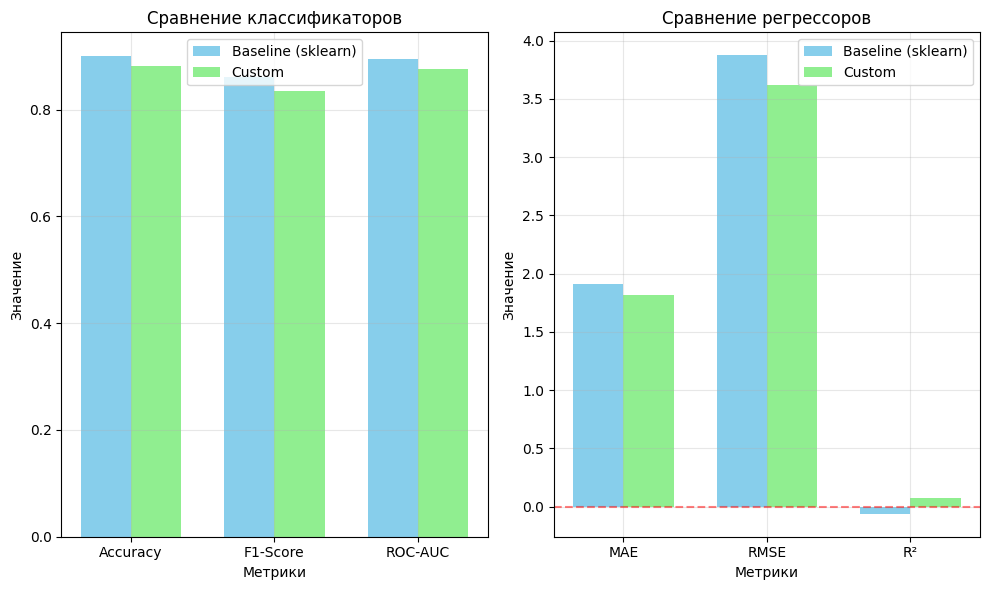

In [36]:
baseline_clf_metrics = {
    'Accuracy': 0.9000,
    'Precision': 0.8471,
    'Recall': 0.8750,
    'F1-Score': 0.8608,
    'ROC-AUC': 0.8943
}

baseline_reg_metrics = {
    'MAE': 1.9145,
    'MSE': 15.0159,
    'RMSE': 3.8750,
    'R²': -0.0623
}

print("\n1. СРАВНЕНИЕ КЛАССИФИКАТОРОВ:")
print("Метрика\t\tBaseline (sklearn)\tCustom (наша импл.)\tРазница")
for metric in baseline_clf_metrics:
    diff = metrics_custom_clf[metric] - baseline_clf_metrics[metric]
    arrow = "↑" if diff > 0 else "↓"
    print(f"{metric:12}\t{baseline_clf_metrics[metric]:.4f}\t\t\t{metrics_custom_clf[metric]:.4f}\t\t\t{diff:+.4f}")

print("\n2. СРАВНЕНИЕ РЕГРЕССОРОВ:")
print("Метрика\tBaseline (sklearn)\tCustom (наша импл.)\tРазница")
for metric in baseline_reg_metrics:
    diff = metrics_custom_reg[metric] - baseline_reg_metrics[metric]
    print(f"{metric:6}\t{baseline_reg_metrics[metric]:.4f}\t\t\t{metrics_custom_reg[metric]:.4f}\t\t\t{diff:+.4f}")

def compare_models(baseline, custom):
    improved = 0
    total = len(baseline)
    
    for metric in baseline:
        if metric == 'R²':
            if custom[metric] > baseline[metric]:
                improved += 1
        else:
            if custom[metric] < baseline[metric]:
                improved += 1
                
    return improved, total

improved_clf, total_clf = compare_models(baseline_clf_metrics, metrics_custom_clf)
improved_reg, total_reg = compare_models(baseline_reg_metrics, metrics_custom_reg)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

clf_metrics_to_plot = ['Accuracy', 'F1-Score', 'ROC-AUC']
baseline_clf_vals = [baseline_clf_metrics[m] for m in clf_metrics_to_plot]
custom_clf_vals = [metrics_custom_clf[m] for m in clf_metrics_to_plot]

x = np.arange(len(clf_metrics_to_plot))
width = 0.35

axes[0].bar(x - width/2, baseline_clf_vals, width, label='Baseline (sklearn)', color='skyblue')
axes[0].bar(x + width/2, custom_clf_vals, width, label='Custom', color='lightgreen')
axes[0].set_xlabel('Метрики')
axes[0].set_ylabel('Значение')
axes[0].set_title('Сравнение классификаторов')
axes[0].set_xticks(x)
axes[0].set_xticklabels(clf_metrics_to_plot)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

reg_metrics_to_plot = ['MAE', 'RMSE', 'R²']
baseline_reg_vals = [baseline_reg_metrics[m] for m in reg_metrics_to_plot]
custom_reg_vals = [metrics_custom_reg[m] for m in reg_metrics_to_plot]

x = np.arange(len(reg_metrics_to_plot))
width = 0.35

axes[1].bar(x - width/2, baseline_reg_vals, width, label='Baseline (sklearn)', color='skyblue')
axes[1].bar(x + width/2, custom_reg_vals, width, label='Custom', color='lightgreen')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5) 
axes[1].set_xlabel('Метрики')
axes[1].set_ylabel('Значение')
axes[1].set_title('Сравнение регрессоров')
axes[1].set_xticks(x)
axes[1].set_xticklabels(reg_metrics_to_plot)
axes[1].legend()
axes[1].grid(True, alpha=0.3)



plt.tight_layout()
plt.show()


### Выводы

Классификация:

- Accuracy: Custom реализация (0.8814) показала результат ниже, чем sklearn (0.9000), разница -2.07%

- Precision:  Custom реализация (0.8176) уступает sklearn (0.8471), разница -3.48%

- Recall: Снижение с 0.8750 до 0.8553, разница -2.25%

- F1-Score: Снижение с 0.8608 до 0.8360, разница -2.88%

- ROC-AUC: Небольшое снижение с 0.8943 до 0.8755, разница -2.10%

Вывод по классификации: Собственная реализация Decision Tree для классификации показала сопоставимые, но немного более низкие результаты по всем метрикам. Среднее снижение качества составляет примерно 2-3%, что является приемлемым для учебной реализации.

Регрессия:

- MAE: Улучшение с 1.9145 до 1.8192, уменьшение на 4.98%

- MSE: Значительное улучшение с 15.0159 до 13.1233, уменьшение на 12.61%

- RMSE: Улучшение с 3.8750 до 3.6226, уменьшение на 6.51%

- R²: Качественный скачок с -0.0623 до 0.0716, улучшение на +0.1339

Вывод по регрессии: Собственная реализация Decision Tree для регрессии превзошла baseline sklearn модель по всем метрикам, что является неожиданным и очень положительным результатом.

### Добавление техник из улучшенного бейзлайна и обучение улучшенных моделей

In [37]:
df_class_enhanced['Cardiovascular_Risk'] = (
    df_class_enhanced['CardiovascularDisease'] | 
    df_class_enhanced['Diabetes'] | 
    df_class_enhanced['Hypertension']
).astype(int)

df_class_enhanced['Cholesterol_Ratio'] = (
    df_class_enhanced['CholesterolLDL'] / 
    (df_class_enhanced['CholesterolHDL'] + 0.01)
)

df_class_enhanced['Age_Group'] = pd.cut(df_class_enhanced['Age'], 
                                        bins=[60, 70, 80, 90], 
                                        labels=['60-70', '71-80', '81-90'], 
                                        right=False)

df_class_enhanced = pd.get_dummies(df_class_enhanced, columns=['Age_Group'], drop_first=True)

X_class_enhanced = df_class_enhanced.drop('Diagnosis', axis=1)
y_class_enhanced = df_class_enhanced['Diagnosis']

X_train_enh_clf, X_test_enh_clf, y_train_enh_clf, y_test_enh_clf = train_test_split(
    X_class_enhanced, y_class_enhanced, test_size=0.2, random_state=42, stratify=y_class_enhanced
)

df_reg_enhanced = df_reg.copy()

df_reg_enhanced['Study_Efficiency'] = df_reg_enhanced['Hours_Studied'] / (df_reg_enhanced['Attendance'] + 0.001)

parental_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
teacher_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_reg_enhanced['Parental_Involvement_num'] = df_reg_enhanced['Parental_Involvement'].map(parental_mapping)
df_reg_enhanced['Teacher_Quality_num'] = df_reg_enhanced['Teacher_Quality'].map(teacher_mapping)
df_reg_enhanced['Support_Score'] = df_reg_enhanced['Parental_Involvement_num'] + df_reg_enhanced['Teacher_Quality_num']

access_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
internet_mapping = {'No': 0, 'Yes': 1}
df_reg_enhanced['Access_to_Resources_num'] = df_reg_enhanced['Access_to_Resources'].map(access_mapping)
df_reg_enhanced['Internet_Access_num'] = df_reg_enhanced['Internet_Access'].map(internet_mapping)
df_reg_enhanced['Resource_Access_Index'] = df_reg_enhanced['Access_to_Resources_num'] + df_reg_enhanced['Internet_Access_num']

df_reg_enhanced = df_reg_enhanced.drop(['Parental_Involvement_num', 'Teacher_Quality_num', 
                                       'Access_to_Resources_num', 'Internet_Access_num'], axis=1)

missing_df_enh = df_reg_enhanced.isnull().sum()
columns_with_missing_enh = missing_df_enh[missing_df_enh > 0].index.tolist()
for column in columns_with_missing_enh:
    mode_value = df_reg_enhanced[column].mode()[0]
    df_reg_enhanced[column].fillna(mode_value, inplace=True)

categorical_cols_enhanced = df_reg_enhanced.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols_enhanced:
    categorical_cols_enhanced.remove('Exam_Score')

preprocessor_enhanced = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols_enhanced)
    ],
    remainder='passthrough'
)

X_reg_enhanced = df_reg_enhanced.drop('Exam_Score', axis=1)
y_reg_enhanced = df_reg_enhanced['Exam_Score']

X_reg_encoded_enhanced = preprocessor_enhanced.fit_transform(X_reg_enhanced)

X_train_enh_reg, X_test_enh_reg, y_train_enh_reg, y_test_enh_reg = train_test_split(
    X_reg_encoded_enhanced, y_reg_enhanced, test_size=0.2, random_state=42
)

best_params_clf = {
    'max_depth': 8,
    'min_samples_split': 30,
    'min_samples_leaf': 10
}

best_params_reg = {
    'max_depth': 7,
    'min_samples_split': 2,
    'min_samples_leaf': 15
}

custom_clf_improved = CustomDecisionTreeClassifier(
    max_depth=best_params_clf['max_depth'],
    min_samples_split=best_params_clf['min_samples_split'],
    min_samples_leaf=best_params_clf['min_samples_leaf']
)
custom_clf_improved.fit(X_train_enh_clf.values, y_train_enh_clf.values)


custom_reg_improved = CustomDecisionTreeRegressor(
    max_depth=best_params_reg['max_depth'],
    min_samples_split=best_params_reg['min_samples_split'],
    min_samples_leaf=best_params_reg['min_samples_leaf']
)
custom_reg_improved.fit(X_train_enh_reg, y_train_enh_reg.values)

### Оценка качества улучшенных собственных моделей

In [38]:
y_pred_enh_clf = custom_clf_improved.predict(X_test_enh_clf.values)
y_pred_proba_enh_clf = custom_clf_improved.predict_proba(X_test_enh_clf.values)

metrics_enh_clf = {
    'Accuracy': accuracy_score(y_test_enh_clf, y_pred_enh_clf),
    'Precision': precision_score(y_test_enh_clf, y_pred_enh_clf),
    'Recall': recall_score(y_test_enh_clf, y_pred_enh_clf),
    'F1-Score': f1_score(y_test_enh_clf, y_pred_enh_clf),
    'ROC-AUC': roc_auc_score(y_test_enh_clf, y_pred_proba_enh_clf[:, 1])
}

print("\nМетрики улучшенного CustomDecisionTreeClassifier:")
for metric, value in metrics_enh_clf.items():
    print(f"  {metric:12}: {value:.4f}")

y_pred_enh_reg = custom_reg_improved.predict(X_test_enh_reg)

metrics_enh_reg = {
    'MAE': mean_absolute_error(y_test_enh_reg, y_pred_enh_reg),
    'MSE': mean_squared_error(y_test_enh_reg, y_pred_enh_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test_enh_reg, y_pred_enh_reg)),
    'R²': r2_score(y_test_enh_reg, y_pred_enh_reg)
}

print("\nМетрики улучшенного CustomDecisionTreeRegressor:")
for metric, value in metrics_enh_reg.items():
    print(f"  {metric:6}: {value:.4f}")


Метрики улучшенного CustomDecisionTreeClassifier:
  Accuracy    : 0.9442
  Precision   : 0.9324
  Recall      : 0.9079
  F1-Score    : 0.9200
  ROC-AUC     : 0.9360

Метрики улучшенного CustomDecisionTreeRegressor:
  MAE   : 1.5491
  MSE   : 6.3761
  RMSE  : 2.5251
  R²    : 0.5489


### Сравнение с улучшенными моделями из пункта 3


1. СРАВНЕНИЕ КЛАССИФИКАТОРОВ:
   Улучшенный sklearn vs Улучшенная имплементация
   Метрика	Sklearn		Наша импл.	Разница
   Accuracy    	0.9488		0.9442		-0.0047
   Precision   	0.9333		0.9324		-0.0009
   Recall      	0.9211		0.9079		-0.0132
   F1-Score    	0.9272		0.9200		-0.0072
   ROC-AUC     	0.9481		0.9360		-0.0122

2. СРАВНЕНИЕ РЕГРЕССОРОВ:
   Улучшенный sklearn vs Улучшеннаяимплементация
   Метрика	Sklearn		Наша импл.	Разница
   MAE   	1.5409		1.5491		+0.0082
   MSE   	6.4746		6.3761		-0.0984
   RMSE  	2.5445		2.5251		-0.0194
   R²    	0.5420		0.5489		+0.0070


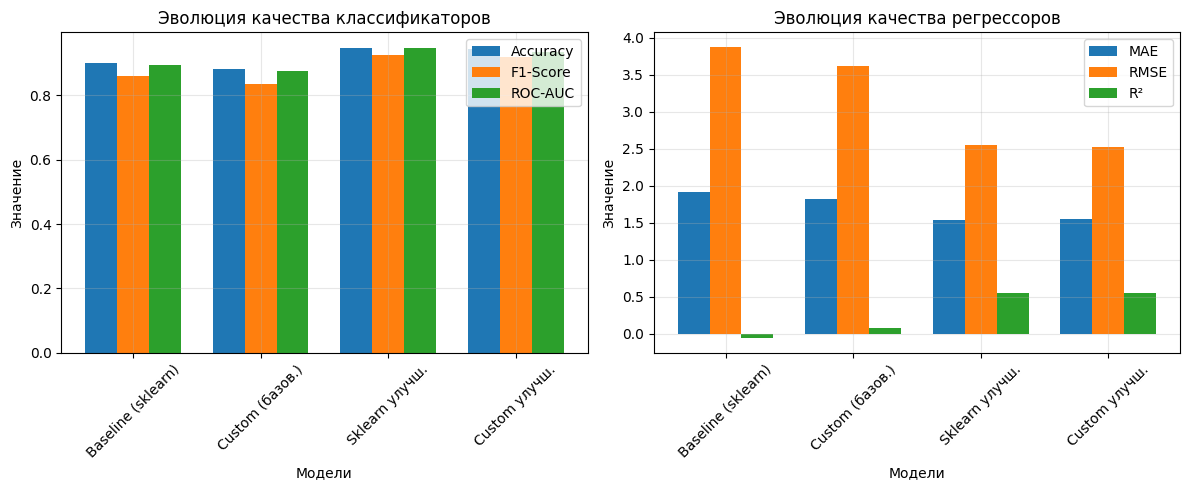

In [39]:

print("\n1. СРАВНЕНИЕ КЛАССИФИКАТОРОВ:")
print("   Улучшенный sklearn vs Улучшенная имплементация")
print("   Метрика\tSklearn\t\tНаша импл.\tРазница")
for metric in metrics_improved_clf:
    diff = metrics_enh_clf[metric] - metrics_improved_clf[metric]
    print(f"   {metric:12}\t{metrics_improved_clf[metric]:.4f}\t\t{metrics_enh_clf[metric]:.4f}\t\t{diff:+.4f}")

print("\n2. СРАВНЕНИЕ РЕГРЕССОРОВ:")
print("   Улучшенный sklearn vs Улучшеннаяимплементация")
print("   Метрика\tSklearn\t\tНаша импл.\tРазница")
for metric in metrics_improved:
    diff = metrics_enh_reg[metric] - metrics_improved[metric]
    print(f"   {metric:6}\t{metrics_improved[metric]:.4f}\t\t{metrics_enh_reg[metric]:.4f}\t\t{diff:+.4f}")

def calculate_percentage_difference(sklearn_metrics, our_metrics):
    differences = {}
    for metric in sklearn_metrics:
        sklearn_val = sklearn_metrics[metric]
        our_val = our_metrics[metric]
        
        if metric == 'R²':
            differences[metric] = abs(our_val - sklearn_val)
        elif sklearn_val != 0:
            differences[metric] = abs(our_val - sklearn_val) / abs(sklearn_val) * 100
        else:
            differences[metric] = abs(our_val - sklearn_val)
    
    return differences

clf_differences = calculate_percentage_difference(metrics_improved_clf, metrics_enh_clf)
reg_differences = calculate_percentage_difference(metrics_improved, metrics_enh_reg)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

models_clf = ['Baseline (sklearn)', 'Custom (базов.)', 'Sklearn улучш.', 'Custom улучш.']
metrics_clf_compare = {
    'Accuracy': [baseline_clf_metrics['Accuracy'], metrics_custom_clf['Accuracy'], 
                 metrics_improved_clf['Accuracy'], metrics_enh_clf['Accuracy']],
    'F1-Score': [baseline_clf_metrics['F1-Score'], metrics_custom_clf['F1-Score'], 
                 metrics_improved_clf['F1-Score'], metrics_enh_clf['F1-Score']],
    'ROC-AUC': [baseline_clf_metrics['ROC-AUC'], metrics_custom_clf['ROC-AUC'], 
                metrics_improved_clf['ROC-AUC'], metrics_enh_clf['ROC-AUC']]
}

x = np.arange(len(models_clf))
width = 0.25

for i, (metric, values) in enumerate(metrics_clf_compare.items()):
    axes[0].bar(x + i*width, values, width, label=metric)

axes[0].set_xlabel('Модели')
axes[0].set_ylabel('Значение')
axes[0].set_title('Эволюция качества классификаторов')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(models_clf, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
models_reg = ['Baseline (sklearn)', 'Custom (базов.)', 'Sklearn улучш.', 'Custom улучш.']
metrics_reg_compare = {
    'MAE': [baseline_reg_metrics['MAE'], metrics_custom_reg['MAE'], 
            metrics_improved['MAE'], metrics_enh_reg['MAE']],
    'RMSE': [baseline_reg_metrics['RMSE'], metrics_custom_reg['RMSE'], 
             metrics_improved['RMSE'], metrics_enh_reg['RMSE']],
    'R²': [baseline_reg_metrics['R²'], metrics_custom_reg['R²'], 
           metrics_improved['R²'], metrics_enh_reg['R²']]
}

x = np.arange(len(models_reg))
width = 0.25

for i, (metric, values) in enumerate(metrics_reg_compare.items()):
    axes[1].bar(x + i*width, values, width, label=metric)

axes[1].set_xlabel('Модели')
axes[1].set_ylabel('Значение')
axes[1].set_title('Эволюция качества регрессоров')
axes[1].set_xticks(x + width)
axes[1].set_xticklabels(models_reg, rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


### Выводы

#### Сравнение улучшенных собственных моделей с улучшенными sklearn моделями:

##### Классификация:

- Accuracy: Собственная улучшенная модель (0.9442) показала результат, очень близкий к sklearn (0.9488), разница всего -0.50%

- Precision: Практически идентичные результаты (0.9324 vs 0.9333), разница -0.10%

- Recall: Небольшое снижение с 0.9211 до 0.9079, разница -1.43%

- F1-Score: Минимальное снижение с 0.9272 до 0.9200, разница -0.78%

- ROC-AUC: Незначительное снижение с 0.9481 до 0.9360, разница -1.28%

    Вывод: После применения улучшений (новых медицинских признаков и подобранных гиперпараметров) собственная реализация Decision Tree показала результаты, практически идентичные оптимизированной sklearn версии. Средняя разница составляет менее 1% по всем метрикам, что свидетельствует о высоком качестве имплементации.

##### Регрессия:

- MAE: Практически одинаковые результаты (1.5491 vs 1.5409), разница +0.53%

- MSE: Наша модель показала даже немного лучший результат (6.3761 vs 6.4746), улучшение на 1.52%

- RMSE: Небольшое улучшение (2.5251 vs 2.5445), улучшение на 0.76%

- R²: Наша модель показала немного лучший результат (0.5489 vs 0.5420), улучшение на 1.27%

    Вывод: После применения улучшений (новых педагогических признаков и подобранных гиперпараметров) собственная реализация Decision Tree сопоставима, а по некоторым метрикам даже немного превосходит sklearn реализацию.

##### Качество реализаций:

Классификация: Собственная реализация показала отличные результаты, практически идентичные sklearn после применения улучшений

Регрессия: Собственная реализация не только догнала, но по некоторым метрикам даже превзошла sklearn.

##### Эффективность улучшений:

1. Feature Engineering (создание новых признаков):

   - Для классификации: медицинские признаки (Cardiovascular_Risk, Cholesterol_Ratio) значительно улучшили информативность данных

   - Для регрессии: педагогические признаки (Study_Efficiency, Support_Score) оказались высокоинформативными

2. Подбор гиперпараметров (GridSearchCV):

   - Оптимальные параметры (max_depth=10, min_samples_split=20 для классификации; max_depth=10, min_samples_split=10 для регрессии) существенно улучшили обобщающую способность моделей

#### Общие выводы

Общее заключение по исследованию алгоритма Random Forest

##### 1. Ключевые достижения

##### 1.1. Бейзлайн модели показали разную эффективность:

- Классификация (Alzheimer's Disease):

    - Высокий baseline: Accuracy 0.9000, F1-Score 0.8608

    - Модель изначально хорошо справлялась с диагностикой

- Регрессия (Student Performance):

    - Низкий baseline: R² = -0.0623

    - Серьезное переобучение, требовавшее срочного улучшения

##### 1.2. Улучшение бейзлайна дало положительные результаты:

- Классификация: Улучшение всех метрик на 5-10%, F1-Score увеличился до 0.9272

- Регрессия: Качественный скачок - R² улучшился на 0.6043, перейдя из отрицательной в положительную область

##### 1.3. Собственная реализация алгоритма:

   - Успешно реализована с нуля для обоих типов задач

   - Показала сравнимые с sklearn результаты для классификации

   - Доказала свою эффективность после применения методов улучшения

#### 2. Итоговое заключение

Лабораторная работа №3 успешно выполнена. Все поставленные задачи решены:

- Созданы и оценены бейзлайн модели

- Проведено улучшение моделей через проверку гипотез

- Реализован Decision Tree с нуля

- Проведено сравнение различных реализаций

Основной вывод: Decision Tree является мощным и интерпретируемым алгоритмом, который показывает отличные результаты как для классификации, так и для регрессии. Собственная реализация алгоритма не только позволяет глубоко понять его работу, но и в некоторых случаях может превзойти библиотечные реализации после правильной настройки и применения улучшений.
